In [81]:
import torch
import numpy as np
import pickle
from utils import groundtruth
from utils import pde_VPINN as pde
from utils import model,tools,validation
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm

In [82]:
dtype = torch.float64


resolution = 128
val_x1=np.arange(0,1,1/resolution).reshape(-1,1)
val_x2=np.arange(0,1,1/resolution).reshape(-1,1)
t_vx1 = torch.from_numpy(val_x1).type(dtype)
t_vx2 = torch.from_numpy(val_x2).type(dtype)



#Generate grids to output graph
val_ms_x1, val_ms_x2 = np.meshgrid(val_x1, val_x2)

plot_val_x1 = np.ravel(val_ms_x1).reshape(-1,1)
plot_val_x2 = np.ravel(val_ms_x2).reshape(-1,1)


t_val_vx1,t_val_vx2 = tools.from_numpy_to_tensor([plot_val_x1,plot_val_x2],[False,False],dtype=dtype)

In [83]:
np.ravel(val_ms_x1).shape

(16384,)

In [84]:
y_wan = torch.load('results/WAN/Test1_ADAM31_all/solNet4900.pt')

In [85]:
validation.validate(y_wan)

(0.2800997125850999,
 array([[-0.00286392],
        [-0.00213877],
        [-0.00134029],
        ...,
        [ 0.00109868],
        [ 0.00023036],
        [-0.00059181]]),
 array([[0.00000000e+00],
        [6.10351562e-05],
        [2.44140625e-04],
        ...,
        [5.49316406e-04],
        [2.44140625e-04],
        [6.10351562e-05]]))

In [86]:
sns.set_theme(style='white')
def plot_2D_data(fig,ax,data,title="",xlabel="",ylabel="",barlabel="",format=None,titlefs=25,labelfs=45,normminmax=None,is_colorbar = True):
    mpl.rcParams['font.size'] = titlefs
    plot_data = data.copy()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_axis_off()
    mpl.rcParams['font.size'] = labelfs
    if is_colorbar:
        if normminmax is not None:
            #im = ax.imshow(plot_data,cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
            im = ax.pcolor(val_ms_x1,val_ms_x2,plot_data, cmap='jet',norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
            cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=1.,pad=0.03,format=format,spacing="proportional",norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))        
            #cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=0.82,pad=0.03,format=format,spacing="proportional",norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
        else:
            #im = ax.imshow(plot_data,cmap=cm.coolwarm)
            im = ax.pcolor(val_ms_x1,val_ms_x2,plot_data, cmap='jet')
            cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=1.,pad=0.03,format=format,spacing="proportional")
        cbar.ax.tick_params(labelsize=labelfs)

def plot_2D_func(net,*args,**kwargs):
    pt_u = net(t_val_vx1,t_val_vx2).detach().numpy().reshape([resolution,resolution])
    plot_2D_data(data=pt_u,*args,**kwargs)

def plot_err(net,data,*args,**kwargs):
    pt_u = net(t_val_vx1,t_val_vx2).detach().numpy().reshape([resolution,resolution])
    err = np.abs(pt_u-data)
    plot_2D_data(data = err,*args,**kwargs)

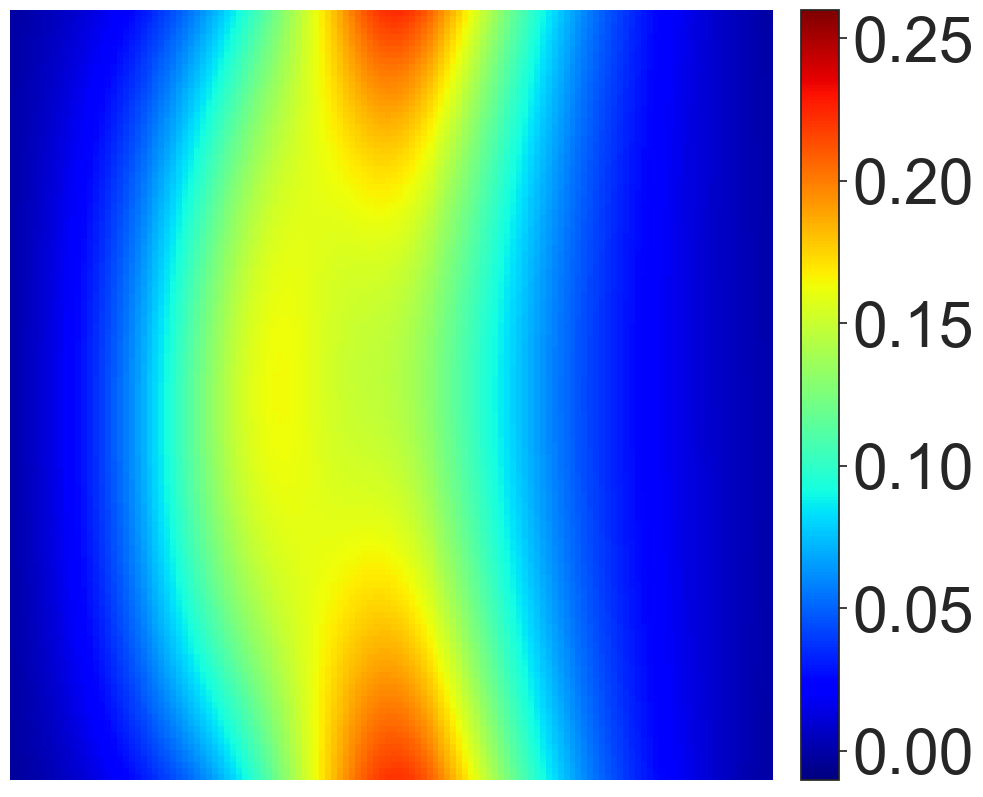

In [87]:
vmin = -0.01
vmax = 0.26
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_func(y_wan,fig=fig,ax=ax,normminmax=[vmin,vmax])
plt.savefig("figures/y_wan_ADAM31_late",dpi=300,bbox_inches="tight")

In [88]:
gtgen = groundtruth.gt_gen()

ygt = gtgen.generate_data(gtgen.y,np.concatenate([val_ms_x1.reshape(-1,1),val_ms_x2.reshape(-1,1)],1)).reshape(resolution,resolution)

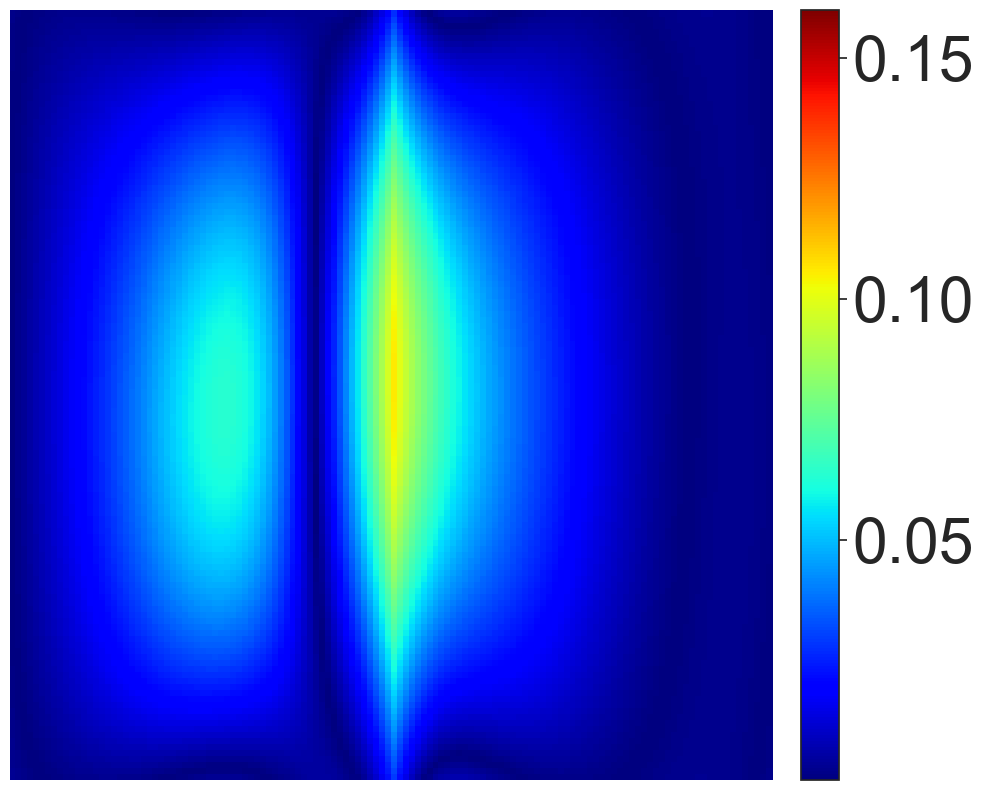

In [89]:
vmin =0.0001
vmax = 0.16
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_err(net=y_wan,data=ygt,fig=fig,ax=ax,normminmax=[vmin,vmax])
plt.savefig("figures/y_wan_ADAM31_late_err",dpi=300,bbox_inches="tight")

In [90]:
import pickle as pkl 

In [91]:
with open("/Users/dual/Documents/projects/MPhil/DNNReview/Ex3.3/results/WAN/Test1_post_AdaGrad_31/vlist",'rb') as f:
    vlist = pkl.load(f)

In [92]:
vlist = np.array(vlist)

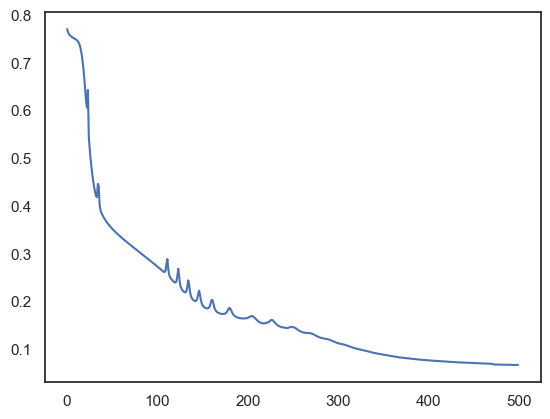

In [93]:
plt.plot(vlist)